In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('kroger_members.csv')
df.head(5)

,kroger_id,has_member_card
0,1,Y
1,2,Y
2,3,NaN
3,4,Y
4,5,NaN


part-1

In [6]:
first_ten=df.head(10)
print("First ten:\n",first_ten)
print("Shape:\n",df.shape)
print("Data types:\n",df.dtypes)


First ten:
    kroger_id has_member_card
0          1               Y
1          2               Y
2          3             NaN
3          4               Y
4          5             NaN
5          6               Y
6          7             NaN
7          8               Y
8          9               Y
9         10               Y
Shape:
 (100, 2)
Data types:
 kroger_id           int64
has_member_card    object
dtype: object


In [7]:
df.columns

Index(['kroger_id', 'has_member_card'], dtype='object')

In [ ]:
null_values=df.isnull().sum()
print("Null values:\n",null_values)


Null values:
 kroger_id           0
has_member_card    37
dtype: int64


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['has_member_card'] = df['has_member_card'].replace(r'^\s*$', 'N', regex=True)
with_membership = (df['has_member_card'] == 'Y').sum()
without_membership = df['has_member_card'].isna().sum()

print("With membership:", with_membership)
print("Without membership:", without_membership)


With membership: 63
Without membership: 37


**Part-2**

In [ ]:
df['has_member_card'] = df['has_member_card'].replace(r'^\s*$', 'N', regex=True)
df


,kroger_id,has_member_card
0,1,Y
1,2,Y
2,3,NaN
3,4,Y
4,5,NaN
...,...,...
95,96,Y
96,97,NaN
97,98,Y
98,99,NaN


In [ ]:
df['kroger_id']=df['kroger_id'].astype(int)
print("Unique:",df['kroger_id'].nunique())
length=len(df)
print("length:",length)

Unique: 100
length: 100


In [ ]:
invalid_ids = df[df['kroger_id'] <= 0]
invalid_ids


,kroger_id,has_member_card


In [ ]:
df.reset_index(drop=True)
df

,kroger_id,has_member_card
0,1,Y
1,2,Y
2,3,NaN
3,4,Y
4,5,NaN
...,...,...
95,96,Y
96,97,NaN
97,98,Y
98,99,NaN


**Part-3**

In [ ]:
length_customers=len(df)
print("Length of customers:",length_customers)

Length of customers: 100


In [ ]:
membership_count=df['has_member_card'].value_counts()
print("Membership count:\n",membership_count)
with_membership = (df['has_member_card'] == 'Y').sum()
without_membership = df['has_member_card'].isna().sum()
print("With membership:", with_membership)
print("Without membership:", without_membership)

Membership count:
 has_member_card
Y    63
Name: count, dtype: int64
With membership: 63
Without membership: 37


In [ ]:
percentage_membership=(with_membership/length_customers)*100
print("Percentage of membership:",percentage_membership)

Percentage of membership: 63.0


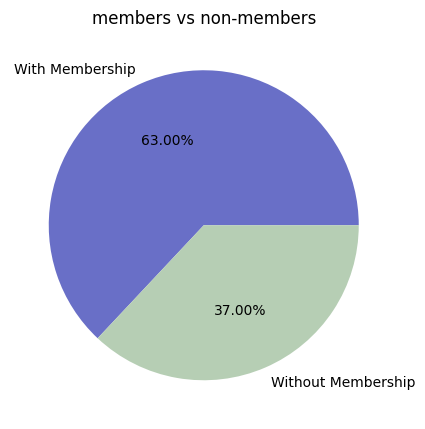

In [ ]:
plt.figure(figsize=(5,6))
plt.pie(
    [with_membership,without_membership],
    labels=['With Membership','Without Membership'],
    autopct="%1.2f%%",
    colors=['#696FC7','#B6CEB4'],
)
plt.title("members vs non-members")
plt.show()

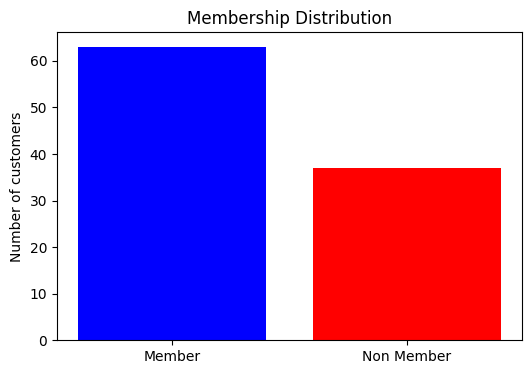

In [ ]:
labels = ['Member', 'Non Member']
counts = [with_membership, without_membership]
colors = ['blue', 'red']

plt.figure(figsize=(6,4))
plt.bar(x=labels, height=counts, color=colors)
plt.ylabel("Number of customers")
plt.title("Membership Distribution")
plt.show()

**Part-4**

In [ ]:
df['membership_numeric'] = df['has_member_card'].map({'Y': 1, 'N': 0})
print(df['membership_numeric'])
mean=df['membership_numeric'].mean()
median=df['membership_numeric'].median()
mode=df['membership_numeric'].mode()
print("Mean:",mean)
print("Median:",median)
print("Mode:",mode)
probability_member=mean
probability_non_member=1-probability_member
print("Probability of being a member:",probability_member)
print("Probability of not being a member:",probability_non_member)

0     1.0
1     1.0
2     NaN
3     1.0
4     NaN
     ... 
95    1.0
96    NaN
97    1.0
98    NaN
99    NaN
Name: membership_numeric, Length: 100, dtype: float64
Mean: 1.0
Median: 1.0
Mode: 0    1.0
Name: membership_numeric, dtype: float64
Probability of being a member: 1.0
Probability of not being a member: 0.0


**Part-5**

In [ ]:
membership_bin=np.array(df['membership_numeric'].fillna(0))
print(membership_bin)

[1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 0. 0.]


In [ ]:
spend_score = np.random.randint(0, 101, size=len(membership_bin))
print("\nSpend Score Array:\n", spend_score)


Spend Score Array:
 [ 77 100  39  89  79  66  20  67  71  44  92  40  31  63   2  64  70  78
  77  27  92  85  16  33  43  35  15  59  71  81  79  73  26  97  20  64
  91  58  44  53  65  94  14  35  32  79  28  86  69  27  26  35  64  15
   6  52  68  91  95  16  61  99  85  17  31  88  70  61  80  60  48  66
  88  43  26  85  72  67  97  48  17   5  10  11  93  39  30  49  11  73
  28  24  11  43  55  98   9  84 100  83]


In [ ]:
vector_addition=membership_bin+spend_score
print("\nVector Addition:\n",vector_addition)


Vector Addition:
 [ 78. 101.  39.  90.  79.  67.  20.  68.  72.  45.  92.  40.  32.  63.
   2.  65.  70.  79.  78.  27.  93.  85.  17.  34.  43.  36.  15.  60.
  71.  82.  79.  74.  27.  98.  21.  65.  91.  58.  44.  54.  66.  95.
  14.  36.  32.  80.  28.  87.  70.  28.  27.  35.  65.  16.   7.  53.
  68.  91.  96.  17.  62. 100.  86.  18.  32.  89.  71.  62.  81.  60.
  48.  66.  89.  44.  26.  85.  72.  68.  98.  49.  17.   6.  11.  12.
  93.  39.  31.  50.  12.  73.  28.  25.  12.  44.  56.  99.   9.  85.
 100.  83.]


In [ ]:
dot_product=np.dot(membership_bin,spend_score)
print("\nDot Product:\n",dot_product)


Dot Product:
 3508.0


In [ ]:
import numpy as np

features=np.column_stack((membership_bin,spend_score))
weight=np.array([0.5,0.5])
matrix_multiplication=np.dot(features,weight)
print("Matrix multiplication:\n",matrix_multiplication)

Matrix multiplication:
 [39.  50.5 19.5 45.  39.5 33.5 10.  34.  36.  22.5 46.  20.  16.  31.5
  1.  32.5 35.  39.5 39.  13.5 46.5 42.5  8.5 17.  21.5 18.   7.5 30.
 35.5 41.  39.5 37.  13.5 49.  10.5 32.5 45.5 29.  22.  27.  33.  47.5
  7.  18.  16.  40.  14.  43.5 35.  14.  13.5 17.5 32.5  8.   3.5 26.5
 34.  45.5 48.   8.5 31.  50.  43.   9.  16.  44.5 35.5 31.  40.5 30.
 24.  33.  44.5 22.  13.  42.5 36.  34.  49.  24.5  8.5  3.   5.5  6.
 46.5 19.5 15.5 25.   6.  36.5 14.  12.5  6.  22.  28.  49.5  4.5 42.5
 50.  41.5]


**Part-6**

In [ ]:
import numpy as np
import pandas as pd

df['Is_Member'] = np.where(df['has_member_card'] == 'Y', 1, 0)
df['Monthly_Spend'] = np.random.uniform(50, 500, size=len(df))
df['Discount_Eligible'] = np.where((df['Is_Member'] == 1) & (df['Monthly_Spend'] > 200), 1, 0)
df['Spend_Quartile'] = pd.qcut(df['Monthly_Spend'], 4, labels=['Q1','Q2','Q3','Q4'])
df

,kroger_id,has_member_card,membership_numeric,Is_Member,Monthly_Spend,Discount_Eligible,Spend_Quartile
0,1,Y,1.0,1,68.235374,0,Q1
1,2,Y,1.0,1,155.904842,0,Q2
2,3,NaN,NaN,0,341.666233,0,Q3
3,4,Y,1.0,1,63.742213,0,Q1
4,5,NaN,NaN,0,257.138491,0,Q3
...,...,...,...,...,...,...,...
95,96,Y,1.0,1,89.052067,0,Q1
96,97,NaN,NaN,0,282.541099,0,Q3
97,98,Y,1.0,1,176.792208,0,Q2
98,99,NaN,NaN,0,498.106515,0,Q4


***Part-7***

In [ ]:
high_spend=df[(df['Is_Member']==1) & (df['Monthly_Spend']>300)]
high_spend

,kroger_id,has_member_card,membership_numeric,Is_Member,Monthly_Spend,Discount_Eligible,Spend_Quartile
9,10,Y,1.0,1,488.561229,1,Q4
15,16,Y,1.0,1,444.111966,1,Q4
22,23,Y,1.0,1,327.520920,1,Q3
25,26,Y,1.0,1,496.472593,1,Q4
29,30,Y,1.0,1,317.266617,1,Q3
31,32,Y,1.0,1,468.817899,1,Q4
34,35,Y,1.0,1,481.334844,1,Q4
39,40,Y,1.0,1,468.974570,1,Q4
41,42,Y,1.0,1,493.711721,1,Q4
43,44,Y,1.0,1,496.923744,1,Q4


In [ ]:
top10_members = df[df['Is_Member'] == 1].sort_values(by='Monthly_Spend', ascending=False).head(10)
top10_members


,kroger_id,has_member_card,membership_numeric,Is_Member,Monthly_Spend,Discount_Eligible,Spend_Quartile
43,44,Y,1.0,1,496.923744,1,Q4
83,84,Y,1.0,1,496.902861,1,Q4
25,26,Y,1.0,1,496.472593,1,Q4
48,49,Y,1.0,1,495.601734,1,Q4
41,42,Y,1.0,1,493.711721,1,Q4
79,80,Y,1.0,1,492.364236,1,Q4
53,54,Y,1.0,1,490.480122,1,Q4
9,10,Y,1.0,1,488.561229,1,Q4
34,35,Y,1.0,1,481.334844,1,Q4
39,40,Y,1.0,1,468.974570,1,Q4


In [ ]:
sort=df.sort_values(by=['Monthly_Spend','kroger_id'],ascending=[False,True])
sort.head(10)

,kroger_id,has_member_card,membership_numeric,Is_Member,Monthly_Spend,Discount_Eligible,Spend_Quartile
98,99,NaN,NaN,0,498.106515,0,Q4
43,44,Y,1.0,1,496.923744,1,Q4
83,84,Y,1.0,1,496.902861,1,Q4
25,26,Y,1.0,1,496.472593,1,Q4
48,49,Y,1.0,1,495.601734,1,Q4
41,42,Y,1.0,1,493.711721,1,Q4
79,80,Y,1.0,1,492.364236,1,Q4
53,54,Y,1.0,1,490.480122,1,Q4
9,10,Y,1.0,1,488.561229,1,Q4
34,35,Y,1.0,1,481.334844,1,Q4


In [ ]:
discount=df['Discount_Eligible'].value_counts()
discount

,count
Discount_Eligible,
0,67
1,33


***Part-8***

In [ ]:
percent_member=(df['Is_Member'].sum()/len(df))*100
print("Percentage of members:",percent_member)
avg_spend_member = df[df['Is_Member'] == 1]['Monthly_Spend'].mean()
avg_spend_non_member = df[df['Is_Member'] == 0]['Monthly_Spend'].mean()
print(f"Average spend for members:{avg_spend_member:.2f}")
print(f"Average spend for non members:{avg_spend_non_member:.2f}")


Percentage of members: 63.0
Average spend for members:265.50
Average spend for non members:247.60


In [ ]:
top_quartile = df[(df['Is_Member'] == 1) & (df['Spend_Quartile'] == 'Q4')]['Monthly_Spend'].mean()
bottom_quartile= df[(df['Is_Member'] == 1) & (df['Spend_Quartile'] == 'Q1')]['Monthly_Spend'].mean()
spending_diff = top_quartile- bottom_quartile
print(f"Spending Difference:{spending_diff:.2f}")

Spending Difference:374.28


In [ ]:
high_spender=df[df['Monthly_Spend']>400]
non_member_high_spender=high_spender[high_spender['Is_Member']==0]
print("Non Member- High spenders",non_member_high_spender)

Non Member- High spenders     kroger_id has_member_card  membership_numeric  Is_Member  Monthly_Spend  \
10         11             NaN                 NaN          0     415.489528   
14         15             NaN                 NaN          0     460.742390   
16         17             NaN                 NaN          0     448.597269   
71         72             NaN                 NaN          0     436.231829   
89         90             NaN                 NaN          0     455.304189   
98         99             NaN                 NaN          0     498.106515   

    Discount_Eligible Spend_Quartile  
10                  0             Q4  
14                  0             Q4  
16                  0             Q4  
71                  0             Q4  
89                  0             Q4  
98                  0             Q4  
